In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
employees = pd.read_csv('https://raw.githubusercontent.com/nivedithabhandary/HR-Analytics/master/HR_comma_sep.csv')
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
employees['salary'] = pd.factorize(employees['salary'])[0]
employees['sales'] = pd.factorize(employees['sales'])[0]

In [4]:
employees.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales                      3.339823
salary                     0.594706
dtype: float64

In [5]:
correlation_matrix = employees.corr(method='pearson')
correlation_matrix 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


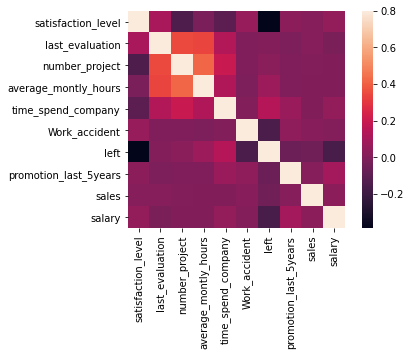

In [6]:
# To plot the correlation_matrix:
import seaborn as maps
maps.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

In [7]:
corr_left=pd.DataFrame(correlation_matrix['left'].drop('left').sort_values(ascending=False))
corr_left

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
sales,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


<AxesSubplot:xlabel='salary', ylabel='left'>

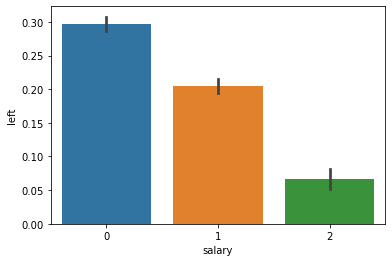

In [8]:
maps.barplot(x = 'salary', y = 'left', data = employees)

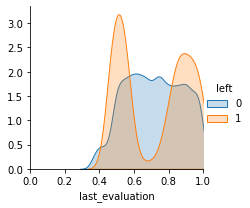

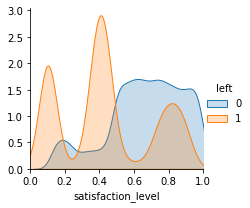

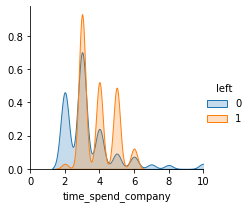

In [9]:
# For last_evaluation

plot_features = ['last_evaluation','satisfaction_level','time_spend_company']

for pf in plot_features:
    g = maps.FacetGrid(employees, hue="left")
    g.map(maps.kdeplot,pf,shade= True)
    g.set(xlim=(0, employees[pf].max()))
    g.add_legend()

In [13]:
# To separate label and features in data
labels = np.where(employees['left'] == 1, 1, 0) 
features = employees.drop('left', axis = 1).astype(np.float)
label_names = np.unique(labels)
feature_names = list(employees.axes[1])

<ipython-input-13-26f5db631e4f>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  features = employees.drop('left', axis = 1).astype(np.float)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

classifiers = [["KNN",KNeighborsClassifier(n_neighbors=3, weights='distance')],
["DT",DecisionTreeClassifier(random_state=0)],
["NB", MultinomialNB()]
]
    
classifier_types = []
for name, clf in classifiers:
    print ('\nMetric for ' + name)
    cv_predicted = cross_val_predict(clf, X_train, Y_train, cv=5)
    print( metrics.classification_report(Y_train, cv_predicted))
    scores = cross_validation.cross_val_score(clf, X_train, Y_train)
    print( '\nCross validation scores: ', scores.mean())

    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    print( 'Accuracy score for '+ name, accuracy_score(Y_test, predictions))
    classifier_types.append((name, clf))


Metric for KNN
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10287
           1       0.85      0.95      0.90      3212

    accuracy                           0.95     13499
   macro avg       0.92      0.95      0.93     13499
weighted avg       0.95      0.95      0.95     13499



NameError: name 'cross_validation' is not defined

In [22]:
from sklearn.tree import export_graphviz
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=5, min_impurity_split=1e-02)
clf = clf.fit(X_train, Y_train)
tree.export_graphviz(clf, out_file='tree.dot')

TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'